<a href="https://colab.research.google.com/github/adalves-ufabc/2024.Q2-PLN/blob/main/2024_Q2_PLN_AULA_15_Notebook_32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2024-Q2]**
Prof. Alexandre Donizeti Alves

## **Sistema de Perguntas e Respostas (Question/Answering)**
---



Um **Sistema de Perguntas e Respostas** (*Question/Answering*, *Q&A*) é uma técnica de PLN projetada para responder a perguntas formuladas em linguagem natural. Esses sistemas são frequentemente utilizados para fornecer respostas a perguntas baseadas em texto ou em documentos, e podem funcionar em diferentes contextos e com diferentes tipos de dados.

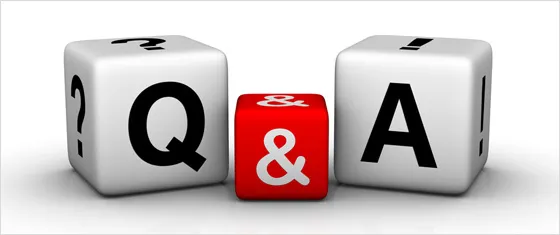

Alguns aspectos:

1. **Entrada**: o sistema recebe uma pergunta formulada em linguagem natural, por exemplo, "Qual é a capital da França?".

2. **Processamento**: o sistema analisa a pergunta e busca informações relevantes em um conjunto de dados, que pode ser um banco de dados, um córpus de textos, ou um documento específico. Isso pode envolver técnicas como análise de texto, recuperação de informações e compreensão de linguagem.

3. **Resposta**: o sistema gera uma resposta com base nas informações encontradas. Em alguns casos, a resposta pode ser diretamente extraída do texto, enquanto em outros, pode ser inferida a partir de várias fontes de dados.

4. **Tipo de Dados**: sistemas de Q&A podem trabalhar com diferentes tipos de dados, incluindo texto não estruturado (como documentos ou artigos), dados estruturados (como tabelas ou bancos de dados) e dados multimodais (como imagens e textos).

5. **Modelos e Técnicas**: esses sistemas podem usar modelos de linguagem avançados ou técnicas tradicionais de recuperação de informações e análise semântica.

6. **Aplicações**: são usados em uma variedade de contextos, incluindo assistentes virtuais, suporte ao cliente, sistemas de ajuda online e análise de grandes volumes de texto.

#### **LangChain**

In [ ]:
#@title Instalando o pacote LangChain
!pip install -qU langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.8/384.8 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.9 MB/s eta 0:00:00


In [ ]:
#@title Versão do LangChain

import langchain

print(langchain.__version__)

0.2.13


In [ ]:
#@title Integração com o pacote da OpenAI

!pip install -qU langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.3/361.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.9 MB/s eta 0:00:00


In [ ]:
#@title Definindo a chave da API da OpenAI

import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass.getpass()

··········


#### **Exemplo**

Arquivos PDF frequentemente contêm dados não estruturados que não estão disponíveis em outras fontes. Eles podem ser bastante longos e, ao contrário dos arquivos de texto simples, geralmente não podem ser inseridos diretamente no *prompt* de um modelo de linguagem.

>
Neste exemplo, você criará um sistema que pode responder a perguntas sobre arquivos PDF. Mais especificamente, você usará um `Document Loader` para carregar o texto em um formato utilizável por um LLM, e depois construirá um pipeline de geração aumentada por recuperação (RAG) para responder perguntas, incluindo citações do material fonte.

In [ ]:
!pip install -qU langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.3 MB/s eta 0:00:00


**Carregando documentos**
>
Primeiro, você precisará escolher um PDF para carregar. Vamos usar um documento do relatório anual público da Nike. Ele tem mais de 100 páginas e contém alguns dados importantes misturados com textos explicativos mais longos.



In [ ]:
import requests

url = 'https://s1.q4cdn.com/806093406/files/doc_downloads/2023/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf'

local_filename = '414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf'

response = requests.get(url, stream=True)

if response.status_code == 200:
    with open(local_filename, 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192):
            file.write(chunk)
    print(f'Arquivo PDF salvo como {local_filename}')
else:
    print(f'Falha ao baixar o arquivo. Status code: {response.status_code}')

Arquivo PDF salvo como 414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf


Depois de escolher seu PDF, o próximo passo é carregá-lo em um formato que um LLM possa manipular mais facilmente, uma vez que os LLMs geralmente requerem entradas de texto. O `LangChain` possui alguns [carregadores de documentos integrados](https://python.langchain.com/v0.2/docs/how_to/document_loader_pdf/) para esse propósito. Abaixo, usaremos um carregador alimentado pelo pacote `pypdf` que lê a partir de um caminho de arquivo:

In [ ]:
!pip install -qU pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 4.4 MB/s eta 0:00:00


In [ ]:
from langchain_community.document_loaders import PyPDFLoader

file_path = "/content/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf"
loader = PyPDFLoader(file_path)

docs = loader.load()

print(len(docs))

106


**O que acabou de acontecer?**
>

- O *loader* lê o PDF no caminho especificado e carrega o conteúdo na memória.
- Em seguida, ele extrai os dados de texto utilizando o pacote *pypdf*.
- Por fim, ele cria um *Document* do **LangChain** para cada página do PDF, contendo o conteúdo da página e alguns metadados sobre de onde o texto foi extraído no documento.

>
O **LangChain** possui [muitos outros carregadores de documentos](https://python.langchain.com/v0.2/docs/integrations/document_loaders/) para outras fontes de dados, ou você pode criar um carregador de documentos personalizado.

In [ ]:
print(docs[0].page_content[0:100])
print(docs[0].metadata)

FORM 10-K FORM 10-K
{'source': '/content/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf', 'page': 0}


In [ ]:
print(docs[11].page_content[0:100])

INFORMATION ABOUT OUR EXECUTIVE OFFICERS
The executive officers of NIKE, Inc. as of July 20, 2023, a


In [ ]:
print(docs[36].page_content[0:100])

FISCAL 2023 NIKE BRAND REVENUE HIGHLIGHTS
The following tables present NIKE Brand revenues disaggreg


In [ ]:
from langchain_community.document_loaders import PyPDFLoader

file_path = "/content/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf"
loader = PyPDFLoader(file_path)

all_docs = loader.load()

page_numbers = [11, 36]
docs = [all_docs[i] for i in page_numbers if i > 0 and i <= len(all_docs)]

print(len(docs))

2


In [ ]:
from IPython.display import Markdown

Markdown(docs[0].page_content)

INFORMATION ABOUT OUR EXECUTIVE OFFICERS
The executive officers of NIKE, Inc. as of July 20, 2023, are as follows:
Mark G. Parker , Executive Chairman — Mr. Parker, 67, is Executive Chairman of the Board of Directors 
and served as President and Chief Executive Officer from 2006 - January 2020. He has been employed 
by NIKE since 1979 with primary responsibilities in product research, design and development, 
marketing and brand management. Mr. Parker was appointed divisional Vice President in charge of 
product development in 1987, corporate Vice President in 1989, General Manager in 1993, Vice 
President of Global Footwear in 1998 and President of the NIKE Brand in 2001.
John J. Donahoe II , President and Chief Executive Officer — Mr. Donahoe, 63, was appointed 
President and Chief Executive Officer in January 2020 and has been a director since 2014. He brings 
expertise in digital commerce, technology and global strategy. He previously served as President and 
Chief Executive Officer at ServiceNow, Inc. Prior to joining ServiceNow, Inc., he served as President and 
Chief Executive Officer of eBay, Inc. He also held leadership roles at Bain & Company for two decades.
Matthew Friend , Executive Vice President and Chief Financial Officer — Mr. Friend, 45, joined NIKE in 
2009 and leads the Company's finance, demand & supply management, procurement and global places 
& services organizations. He joined NIKE as Senior Director of Corporate Strategy and Development, 
and was appointed Chief Financial Officer of Emerging Markets in 2011. In 2014, Mr. Friend was 
appointed Chief Financial Officer of Global Categories, Product and Functions, and was subsequently 
appointed Chief Financial Officer of the NIKE Brand in 2016. He was also appointed Vice President of 
Investor Relations in 2019. Mr. Friend was appointed as Executive Vice President and Chief Financial 
Officer of NIKE, Inc. in April 2020. Prior to joining NIKE, he worked in the financial industry including 
roles as VP of investment banking and mergers and acquisitions at Goldman Sachs and Morgan 
Stanley.
Monique S. Matheson , Executive Vice President, Chief Human Resources Officer — Ms. Matheson, 
56, joined NIKE in 1998, with primary responsibilities in the human resources function. She was 
appointed as Vice President and Senior Business Partner in 2011 and Vice President, Chief Talent and 
Diversity Officer in 2012. Ms. Matheson was appointed Executive Vice President, Global Human 
Resources in 2017.
Ann M. Miller , Executive Vice President, Chief Legal Officer — Ms. Miller, 49, joined NIKE in 2007 and 
serves as EVP, Chief Legal Officer for NIKE, Inc. In her capacity as Chief Legal Officer, she oversees all 
legal, compliance, government & public affairs, social community impact, security, resilience and 
investigation matters of the Company. For the past six years, she served as Vice President, Corporate 
Secretary and Chief Ethics & Compliance Officer. She previously served as Converse's General 
Counsel, and brings more than 20 years of legal and business expertise to her role. P rior to joining 
NIKE, Ms. Miller worked at the law firm Sullivan & Cromwell.
Heidi O'Neill , President, Consumer, Brand & Product — Ms. O'Neill, 58, joined NIKE in 1998 and leads 
the integration of global Men's, Women's & Kids' consumer teams, the entire global product engine and 
global brand marketing and sports marketing to build deep storytelling, relationships and engagement 
with the brand. Since joining NIKE, she has held a variety of key roles, including leading NIKE's 
marketplace and four geographic operating regions, leading NIKE Direct and accelerating NIKE's retail 
and digital-commerce business and creating and leading NIKE's Women’s business. Prior to NIKE, Ms. 
O'Neill held roles at Levi Strauss & Company and Foote, Cone & Belding.
Craig Williams , President, Geographies & Marketplace — Mr. Williams, 54, joined NIKE in 2019 and 
leads NIKE's four geographies and marketplace across the NIKE Direct and wholesale business. In 
addition, he leads the Supply Chain and Logistics organization. Mr. Williams joined NIKE as President of 
Jordan Brand overseeing a team of designers, product developers, marketers and business leaders. 
Prior to NIKE, he was Senior Vice President, The Coca-Cola Co., and President of The McDonald's 
Division (TMD) Worldwide. Mr. Williams has also held roles at CIBA Vision and Kraft Foods Inc., and 
served five years in the U.S. Navy as a Naval Nuclear Power Officer.
NIKE, INC.       8

In [ ]:
from IPython.display import Markdown

Markdown(docs[1].page_content)

FISCAL 2023 NIKE BRAND REVENUE HIGHLIGHTS
The following tables present NIKE Brand revenues disaggregated by reportable operating segment, distribution channel and 
major product line:
FISCAL 2023 COMPARED TO FISCAL 2022
•NIKE, Inc. Revenues were $51.2 billion in fiscal 2023, which increased 10% and 16% compared to fiscal 2022 on a reported 
and currency-neutral basis, respectively. The increase was due to higher revenues in North America, Europe, Middle East & 
Africa ("EMEA"), APLA and Greater China, which contributed approximately 7, 6, 2 and 1 percentage points to NIKE, Inc. 
Revenues, respectively. 
•NIKE Brand revenues, which represented over 90% of NIKE, Inc. Revenues,  increased  10% and 16% on a reported and 
currency-neutral basis, respectively. This increase was primarily due to higher revenues in Men's, the Jordan Brand, 
Women's and Kids' which grew 17%, 35%,11% and 10%, respectively, on a wholesale equivalent basis. 
•NIKE Brand footwear revenues increased 20% on a currency-neutral basis, due to higher revenues in Men's, the 
Jordan Brand, Women's and Kids'. Unit sales of footwear increased 13%, while higher average selling price ("ASP") 
per pair contributed approximately 7 percentage points of footwear revenue growth. Higher ASP was primarily due to 
higher full-price ASP, net of discounts, on a wholesale equivalent basis, and growth in the size of our NIKE Direct 
business, partially offset by lower NIKE Direct ASP. 
•NIKE Brand apparel revenues increased 8% on a currency-neutral basis, primarily due to higher revenues in Men's. 
Unit sales of apparel increased 4%, while higher ASP per unit contributed approximately 4 percentage points of 
apparel revenue growth. Higher ASP was primarily due to higher full-price ASP and growth in the size of our NIKE 
Direct business, partially offset by lower NIKE Direct ASP, reflecting higher promotional activity.
•NIKE Direct revenues increased 14% from $18.7 billion in fiscal 2022 to $21.3 billion in fiscal 2023. On a currency-neutral 
basis, NIKE Direct revenues increased 20% primarily driven by NIKE Brand Digital sales growth of 24%, comparable store 
sales growth of 14% and the addition of new stores. For further information regarding comparable store sales, including the 
definition, see "Comparable Store Sales". NIKE Brand Digital sales were $12.6 billion for fiscal 2023 compared to 
$10.7 billion for fiscal 2022.
2023 FORM 10-K   33    28%
EMEA13%
APLA44%
North
America
15%
Greater
China56%
Wholesale
44%
NIKE
Direct28%
Apparel4%
Equipment68%
Footwear

**Resposta a perguntas com *RAG***
>

Em seguida, é necessário preparar os documentos carregados para posterior recuperação. Usando um *text splitter*, você dividirá seus documentos carregados em documentos menores que podem ser mais facilmente acomodados na janela de contexto de um LLM, e então os carregará em um *vector store*. A partir daí, você pode criar um *retriever* a partir do *vector store* para usar na nossa *RAG chain*.

In [ ]:
from langchain_openai import ChatOpenAI

modelo = ChatOpenAI(model="gpt-4o-mini")

O **Chroma** é uma das opções de `vector stores` (ou banco de dados de vetores) utilizados para armazenar e recuperar vetores de *embeddings*, que são representações numéricas de dados textuais ou outros tipos de informação.

In [ ]:
!pip install -qU langchain_chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 10.3 MB/s eta 0:00:00

In [ ]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)
vectorstore = Chroma.from_documents(documents=splits, embedding=OpenAIEmbeddings())

retriever = vectorstore.as_retriever()

In [ ]:
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate

system_prompt = (
    "You are an assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer "
    "the question. If you don't know the answer, say that you "
    "don't know. Use three sentences maximum and keep the "
    "answer concise."
    "\n\n"
    "{context}"
)

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{input}"),
    ]
)

question_answer_chain = create_stuff_documents_chain(modelo, prompt)

# recuperação de documentos relevantes
rag_chain = create_retrieval_chain(retriever, question_answer_chain)

resposta = rag_chain.invoke({"input": "Quem se juntou à NIKE em 2019?"})

In [ ]:
resposta

{'input': 'Quem se juntou à NIKE em 2019?',
 'context': [Document(metadata={'page': 11, 'source': '/content/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf'}, page_content="Jordan Brand overseeing a team of designers, product developers, marketers and business leaders. \nPrior to NIKE, he was Senior Vice President, The Coca-Cola Co., and President of The McDonald's \nDivision (TMD) Worldwide. Mr. Williams has also held roles at CIBA Vision and Kraft Foods Inc., and \nserved five years in the U.S. Navy as a Naval Nuclear Power Officer.\nNIKE, INC.       8"),
  Document(metadata={'page': 11, 'source': '/content/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf'}, page_content="Resources in 2017.\nAnn M. Miller , Executive Vice President, Chief Legal Officer — Ms. Miller, 49, joined NIKE in 2007 and \nserves as EVP, Chief Legal Officer for NIKE, Inc. In her capacity as Chief Legal Officer, she oversees all \nlegal, compliance, government & public affairs, social community impact, security, resilien

In [ ]:
from IPython.display import Markdown

Markdown(resposta["answer"])

Craig Williams se juntou à NIKE em 2019. Ele é o Presidente das Geografias e do Mercado e, anteriormente, foi Presidente da Jordan Brand.

In [ ]:
from IPython.display import Markdown

Markdown(resposta["context"][0].page_content)

Jordan Brand overseeing a team of designers, product developers, marketers and business leaders. 
Prior to NIKE, he was Senior Vice President, The Coca-Cola Co., and President of The McDonald's 
Division (TMD) Worldwide. Mr. Williams has also held roles at CIBA Vision and Kraft Foods Inc., and 
served five years in the U.S. Navy as a Naval Nuclear Power Officer.
NIKE, INC.       8

Você pode ver que obtém tanto uma resposta final na chave `answer` do dicionário de resultados, quanto o `context` que o LLM usou para gerar uma resposta.

>
Examinando mais detalhadamente os valores sob o `context`, você pode ver que eles são documentos que contêm um fragmento do conteúdo da página processada. De forma útil, esses documentos também preservam os metadados originais desde quando você os carregou pela primeira vez:

In [ ]:
print(resposta["context"][0].metadata)

{'page': 11, 'source': '/content/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf'}


Mais uma questão:

In [ ]:
resposta = rag_chain.invoke({"input": "Qual foi a receita da Nike em 2023?"})

In [ ]:
from IPython.display import Markdown

Markdown(resposta["answer"])

A receita da Nike em 2023 foi de 51,2 bilhões de dólares, um aumento de 10% em comparação ao ano fiscal de 2022.

In [ ]:
print(resposta["context"][0].metadata)

{'page': 36, 'source': '/content/414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf'}


## **Referências**

> https://python.langchain.com/v0.2/docs/tutorials/pdf_qa/


>